In [1256]:
import pandas as pd
import numpy as np


In [1257]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1258]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [1259]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [1260]:
data['diagnosis'].unique() #The goal is to make a model for classification. The tumor will be recognized as 
#malignant or benign based on the characteristics (30 features in total). Here are the two classes we have got:

array(['M', 'B'], dtype=object)

In [1261]:
#Let's prepare the data for analysis. Let's explore the data and check for missing values 
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [1262]:
data['Unnamed: 32'].isnull().sum()

569

In [1263]:
df = data.drop('Unnamed: 32', 1) #droping the column with NaN values. Normaly this should be clarified 
#with those who provided data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1264]:
df.shape[0]

569

In [1265]:
#Splitting for comfy exploratory preview of the data
df1 = df.iloc[:, 1:6]
df2 = df.iloc[:, 6:12]
df2['diagnosis']=df1['diagnosis']
df3=df.iloc[:, 12:17]
df3['diagnosis']=df1['diagnosis']
df4=df.iloc[:, 17:23]
df4['diagnosis']=df1['diagnosis']
df5=df.iloc[:, 23:27]
df5['diagnosis']=df1['diagnosis']
df6=df.iloc[:, 27:32]
df6['diagnosis']=df1['diagnosis']

In [1266]:
df4.head()

,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,M
1,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,M
2,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,M
3,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,M
4,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,M


In [1268]:
df.drop("id",axis=1,inplace=True)

In [1269]:
feat_mean= list(df.columns[1:11])
feat_se= list(df.columns[11:20])
feat_worst=list(df.columns[21:31])

In [1270]:
import seaborn as sns
import sklearn
print(sklearn.__version__)


0.19.0


In [1271]:
train, test = train_test_split(df, test_size = 0.3)

#training_input = train[inputs]# taking the training data input 
training_input = train.iloc[:, 1:32]
training_output=train.diagnosis # This is output of our training data
# same we have to do for test
testing_input = test.iloc[:, 1:32]
#testing_input= test[inputs] # taking test data inputs
testing_output =test.diagnosis   #output value of test dat

In [1272]:
#Given an external estimator that assigns weights to features 
#(e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) 
#is to select features by recursively considering smaller and smaller sets of features. 


from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

col = df.columns[1:]


LR = LogisticRegression()

selector = RFE(LR, 5, step=1)
selector = selector.fit(training_input, training_output)
index = np.where(selector.support_)[0]
inp = col[index]

train, test = train_test_split(df, test_size = 0.3)
training_input = train[inp]# taking the training data input 
training_output=train.diagnosis # This is output of our training data
# same we have to do for test
testing_input= test[inp] # taking test data inputs
testing_output =test.diagnosis   #output value of test dat





print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)
index = np.where(selector.support_)[0]
print("Selected features: %s" % col[index])

Selected Features: [ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False  True  True False False]
Feature Ranking: [ 1  8 13 24 12 17  1  2  3 22 25  7 21 10 23 15 14 19 18 26  1  9  6 20 11
  4  1  1 16  5]
Selected features: Index(['radius_mean', 'concavity_mean', 'radius_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [1273]:
#All mean inputs
inputs = ['area_mean','radius_mean','texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean', 'concavity_mean', 'concave points_mean']
#Reduced mean inputs based on exclusion of correlated factors
inputs2 = ['radius_mean', 'symmetry_mean', 'texture_mean', 'compactness_mean']
#5 Features selected by RFE method
inputs4 = col[index]

In [1274]:
train, test = train_test_split(df, test_size = 0.3)
training_input = train[inputs4]# taking the training data input 
training_output=train.diagnosis # This is output of our training data
# same we have to do for test
testing_input= test[inputs4] # taking test data inputs
testing_output =test.diagnosis   #output value of test dat

In [1276]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

In [1]:
#It is possible to tune parameters in order to use the optimal one providing best accuracy. 
#We will use gridSearchCV for that purpose.
#From confusion_matrix we will get rates of predicted values (True negative rate, true positive rate, and so on)


In [1278]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


DTC = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}
    

grid_search = GridSearchCV(DTC,
                           param_grid=parameters,
                           cv=10)

grid_search.fit(training_input, training_output)
cv = cross_val_score(DTC, df[inputs4], df['diagnosis'], cv=10)

DTC = DecisionTreeClassifier(**grid_search.best_params_)



trained = DTC.fit(training_input, training_output)
predicted = DTC.predict(testing_input)
cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_DTC = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_DTC = (TP+TN)/(TP+FP+FN+TN)
recall = recall_score(testing_output, predicted, average='weighted') 


print('Best classifier accuracy score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_DTC))
print('Overall accuracy: {}'.format(ACC_DTC))
print('Recall: {}'.format(recall))

Best classifier accuracy score: 0.949748743718593
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}
Cross_val: [ 0.9137931   0.84482759  0.87719298  0.92982456  0.89473684  0.89473684
  0.9122807   0.94642857  0.94642857  0.94642857]
False negative rate: 0.09090909090909091
Overall accuracy: 0.9181286549707602
Recall: 0.9181286549707602


In [1279]:
#Lets try Random forest classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

parameters = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}


grid_search = GridSearchCV(RFC,
                           param_grid=parameters,
                           cv=10)

grid_search.fit(training_input, training_output)
cv = cross_val_score(DTC, df[inputs4], df['diagnosis'], cv=10)
RFC = RandomForestClassifier(**grid_search.best_params_)
trained = RFC.fit(training_input, training_output)
predicted = RFC.predict(testing_input)


cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_RFC = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_RFC = (TP+TN)/(TP+FP+FN+TN)
recall = recall_score(testing_output, predicted, average='weighted') 


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_RFC))
print('Overall accuracy: {}'.format(ACC_RFC))
print('Recall: {}'.format(recall))

Best score: 0.9522613065326633
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 50, 'warm_start': False}
Cross_val: [ 0.9137931   0.86206897  0.89473684  0.92982456  0.92982456  0.9122807
  0.92982456  0.94642857  0.85714286  0.94642857]
False negative rate: 0.06481481481481481
Overall accuracy: 0.9415204678362573
Recall: 0.9415204678362573


In [1280]:
#Nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

CN = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
parameters = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

grid_search = GridSearchCV(CN,
                           param_grid=parameters,
                           cv=10)

grid_search.fit(training_input, training_output)
cv = cross_val_score(CN, df[inputs4], df['diagnosis'], cv=10)
CN = KNeighborsClassifier(**grid_search.best_params_)

trained = CN.fit(training_input, training_output)
predicted = CN.predict(testing_input)
cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_CN = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_CN = (TP+TN)/(TP+FP+FN+TN)
recall = recall_score(testing_output, predicted, average='weighted') 


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_CN))
print('Overall accuracy: {}'.format(ACC_CN))
print('Recall: {}'.format(recall))


Best score: 0.9422110552763819
Best parameters: {'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
Cross_val: [ 0.9137931   0.87931034  0.89473684  0.96491228  0.94736842  0.9122807
  0.94736842  0.91071429  0.91071429  0.98214286]
False negative rate: 0.09090909090909091
Overall accuracy: 0.9181286549707602
Recall: 0.9181286549707602


In [1281]:
from sklearn.svm import SVC
#train, test = train_test_split(df, test_size = 0.3)
#training_input = train[inputs]# taking the training data input 
#training_output=train.diagnosis # This is output of our training data
# same we have to do for test
#testing_input= test[inputs] # taking test data inputs
#testing_output =test.diagnosis   #output value of test dat



SV = SVC()


parameters = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]

grid_search = GridSearchCV(SV,
                           param_grid=parameters,
                           cv=10)

grid_search.fit(training_input, training_output)
cv = cross_val_score(SV, df[inputs4], df['diagnosis'], cv=10)
SV = SVC(**grid_search.best_params_)
trained = SV.fit(training_input, training_output)
predicted = SV.predict(testing_input)
cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_SV = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_SV = (TP+TN)/(TP+FP+FN+TN)
recall = recall_score(testing_output, predicted, average='weighted') 


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_SV))
print('Overall accuracy: {}'.format(ACC_SV))
print('Recall: {}'.format(recall))



Best score: 0.957286432160804
Best parameters: {'C': 10, 'kernel': 'linear'}
Cross_val: [ 0.94827586  0.89655172  0.9122807   0.96491228  0.96491228  0.94736842
  0.94736842  0.92857143  0.94642857  0.96428571]
False negative rate: 0.047619047619047616
Overall accuracy: 0.9473684210526315
Recall: 0.9473684210526315


In [1282]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(training_input, training_output)
cv = cross_val_score(LR, df[inputs4], df['diagnosis'], cv=10)
classifier_accuracy = LR.score(testing_input, testing_output)

trained = LR.fit(training_input, training_output)
predicted = LR.predict(testing_input)
cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_LR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_LR = (TP+TN)/(TP+FP+FN+TN)
recall = recall_score(testing_output, predicted, average='weighted') 


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_LR))
print('Overall accuracy: {}'.format(ACC_LR))
print('Recall: {}'.format(recall))

Best score: 0.957286432160804
Best parameters: {'C': 10, 'kernel': 'linear'}
Cross_val: [ 0.9137931   0.93103448  0.92982456  0.96491228  0.94736842  0.9122807
  0.96491228  0.92857143  0.94642857  0.98214286]
False negative rate: 0.06481481481481481
Overall accuracy: 0.9415204678362573
Recall: 0.9415204678362573


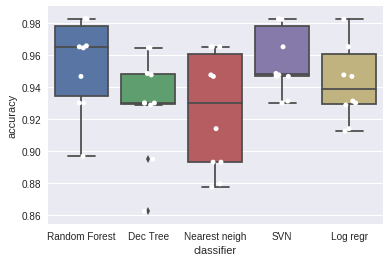

In [1283]:
#It turns out that RFC shouws better results. Comparing classifiers:


rf_df = pd.DataFrame({'accuracy': cross_val_score(RFC, df[inputs4], df['diagnosis'], cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(DTC, df[inputs4], df['diagnosis'], cv=10),
                      'classifier': ['Dec Tree'] * 10})
cn_df = pd.DataFrame({'accuracy': cross_val_score(CN, df[inputs4], df['diagnosis'], cv=10),
                      'classifier': ['Nearest neigh'] * 10})
sv_df = pd.DataFrame({'accuracy': cross_val_score(SV, df[inputs4], df['diagnosis'], cv=10),
                      'classifier': ['SVN'] * 10})
lr_df = pd.DataFrame({'accuracy': cross_val_score(LR, df[inputs4], df['diagnosis'], cv=10),
                      'classifier': ['Log regr'] * 10})


all_df = rf_df.append([dt_df, cn_df, sv_df, lr_df])


sb.boxplot(x='classifier', y='accuracy', data=all_df)
sb.stripplot(x='classifier', y='accuracy', data=all_df, jitter=True, color='white')

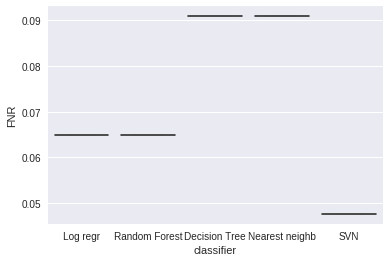

In [1284]:
lr = pd.DataFrame({'FNR': FNR_LR,'classifier':['Log regr'] * 10})
rf = pd.DataFrame({'FNR': FNR_RFC,'classifier':['Random Forest'] * 10})
dt = pd.DataFrame({'FNR': FNR_DTC,'classifier':['Decision Tree'] * 10})
cn = pd.DataFrame({'FNR': FNR_CN,'classifier':['Nearest neighb'] * 10})
sv = pd.DataFrame({'FNR': FNR_SV,'classifier':['SVN'] * 10})


all_d = lr.append([rf, dt, cn, sv])


sb.boxplot(x='classifier', y='FNR', data=all_d)


In [1285]:

SV = SVC(**grid_search.best_params_)

SV.fit(training_input, training_output)
trained = SV.fit(training_input, training_output)
predicted = SV.predict(testing_input)
cm = confusion_matrix(testing_output, predicted)

FP = cm[0][1]  
FN = cm[1][0]
TN = cm[1][1]
TP = cm[0][0]

# Recall/sensitivity/hit rate, or true positive rate
TPR = TP/(TP+FN)
# True negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR_SV = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_SV = (TP+TN)/(TP+FP+FN+TN)

recall = recall_score(testing_output, predicted, average='weighted')  
cv = cross_val_score(SV, df[inputs4], df['diagnosis'], cv=10)
classifier_accuracy = SV.score(testing_input, testing_output)


print('Cross_val: {}'.format(cv))
print('False negative rate: {}'.format(FNR_SV))
print('Overall accuracy: {}'.format(ACC_SV))
print('Recall: {}'.format(recall))


for input_features, prediction, actual in zip(testing_input,
                                              SV.predict(testing_input),
                                              testing_output):
    print('{}\t\t{}\t(Actual: {})'.format(input_features, prediction, actual))


Cross_val: [ 0.94827586  0.93103448  0.92982456  0.96491228  0.98245614  0.94736842
  0.98245614  0.94642857  0.94642857  0.98214286]
False negative rate: 0.047619047619047616
Overall accuracy: 0.9473684210526315
Recall: 0.9473684210526315
radius_mean		B	(Actual: B)
concavity_mean		M	(Actual: M)
radius_worst		B	(Actual: B)
concavity_worst		B	(Actual: B)
concave points_worst		B	(Actual: B)


In [1144]:
#After optimizations, 0.045 is the lowest False Negative Rate obtained with SV classifier.
#Corresponding recall is 0.95 - measures the proportion of positives that are correctly identified as such 
#(i.e. the percentage of sick people who are correctly identified as having the condition)